In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [26]:

img = cv2.imread(r"C:\Users\user\PycharmProjects\Data_Science_Course_SSWU\task_8\images\map.tif")



In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

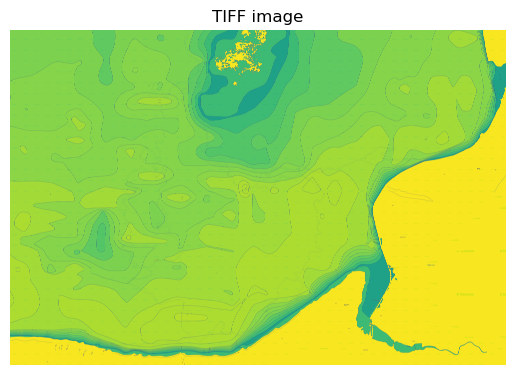

In [14]:

plt.imshow(gray)
plt.title("TIFF image")
plt.axis("off")
plt.show()


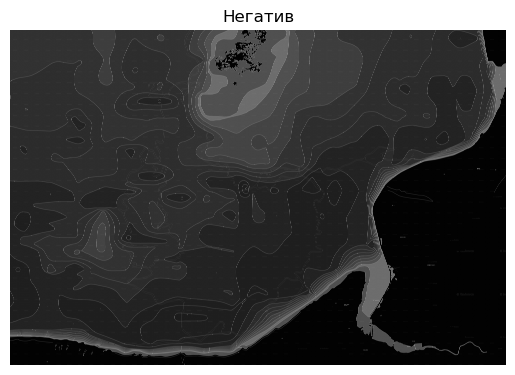

In [15]:
gray_neg = 255 - gray

plt.imshow(gray_neg, cmap='gray')
plt.title("Негатив")
plt.axis("off")
plt.show()


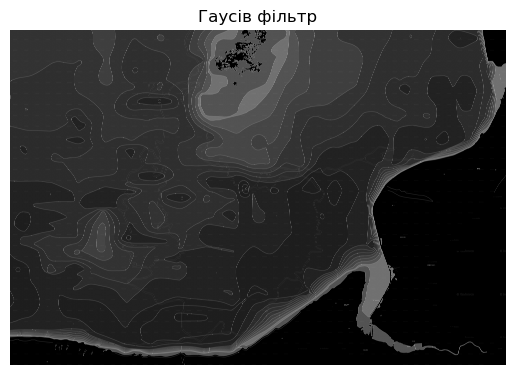

In [17]:
blurred = cv2.GaussianBlur(gray_neg, (5, 5), sigmaX=1)

plt.imshow(blurred, cmap='gray')
plt.title("Гаусів фільтр")
plt.axis("off")
plt.show()


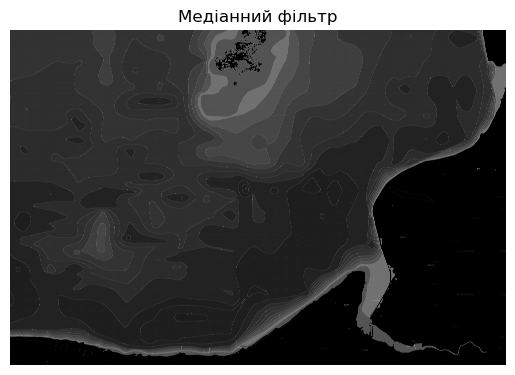

In [18]:
median = cv2.medianBlur(gray_neg, 5)

plt.imshow(median, cmap='gray')
plt.title("Медіанний фільтр")
plt.axis("off")
plt.show()


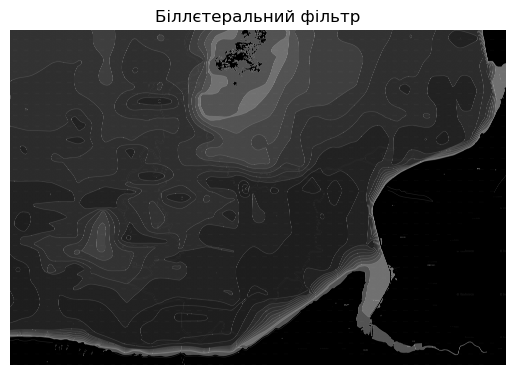

In [19]:
bilateral = cv2.bilateralFilter(gray_neg, d=9, sigmaColor=75, sigmaSpace=75)

plt.imshow(bilateral, cmap='gray')
plt.title("Біллєтеральний фільтр")
plt.axis("off")
plt.show()


In [21]:
def detect_harris_corners(gray_image, block_size=2, ksize=3, k=0.04):
    # Перетворити в float32
    gray_float = np.float32(gray_image)

    # Детектор Харріса
    dst = cv2.cornerHarris(gray_float, block_size, ksize, k)

    # Ділатуємо для візуалізації
    dst_dilated = cv2.dilate(dst, None)

    # Поріг: кути мають значення > 1% від max
    threshold = 0.01 * dst_dilated.max()
    corners = dst_dilated > threshold

    num_corners = np.sum(corners)
    print(f"Кількість кутів: {num_corners}")

    output = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    output[corners] = [0, 0, 255]
    return output, num_corners


Кількість кутів: 314892


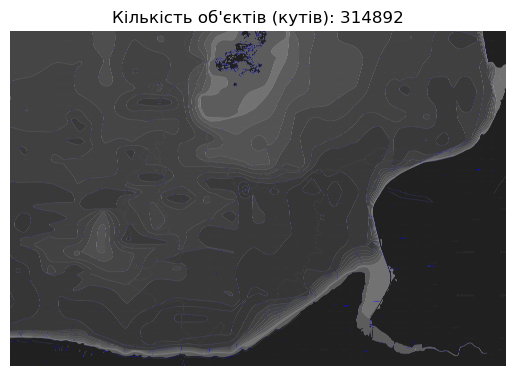

In [23]:
output_img, num_corners = detect_harris_corners(gray_neg)

plt.imshow(output_img)
plt.title(f"Кількість об'єктів (кутів): {num_corners}")
plt.axis("off")
plt.show()

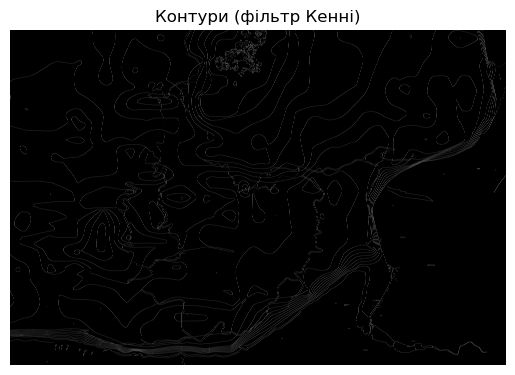

In [24]:
edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

plt.imshow(edges, cmap='gray')
plt.title("Контури (фільтр Кенні)")
plt.axis("off")
plt.show()


Кількість контурів: 942


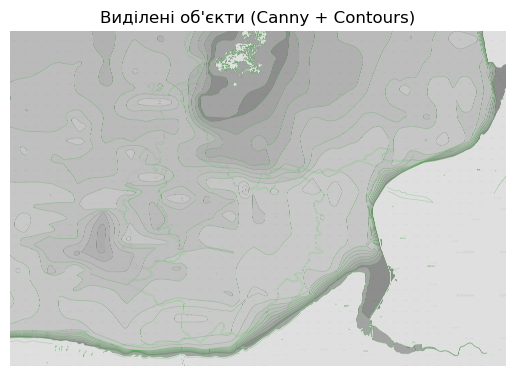

In [25]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Кількість контурів: {len(contours)}")

contour_output = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_output, contours, -1, (0, 255, 0), 1)

plt.imshow(contour_output)
plt.title("Виділені об'єкти (Canny + Contours)")
plt.axis("off")
plt.show()
